# **Project Scenario**

You are hired as a data scientist for a university. The university wants to predict whether 
passengers survived the Titanic disaster based on various factors such as their age, gender, 
ticket class, and fare paid. You will use the k-NN and Decision Tree algorithms to build 
models that predict whether a passenger survived. 

# importing the necessary Libraries

In [100]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score,precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

### Part 1: Data Exploration and Preprocessing

- Load the dataset and display the first few rows.

In [76]:
train_data = pd.read_csv('./titanic/train.csv')

print("----------------------------------------------")
print("         First few rows of the Dataset:       ")
print("----------------------------------------------\n")
print(train_data.head())

----------------------------------------------
         First few rows of the Dataset:       
----------------------------------------------

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 

- Visualize the distribution of key features (like `Pclass`, `Age`, `Sex`, etc.)

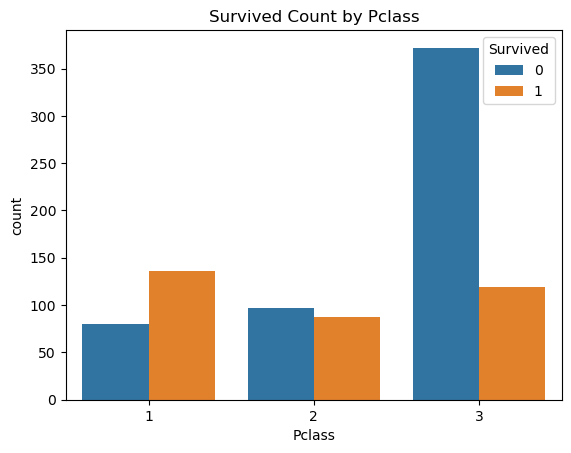

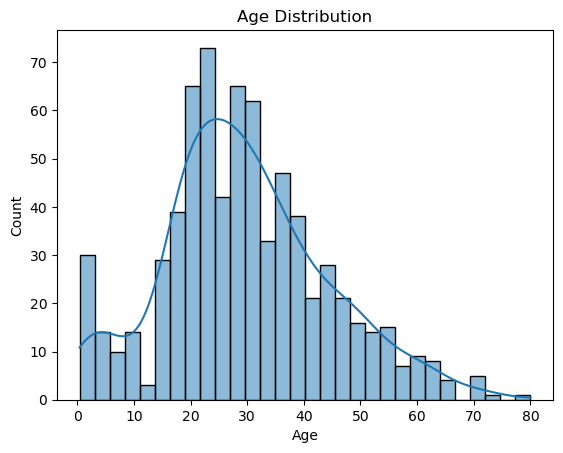

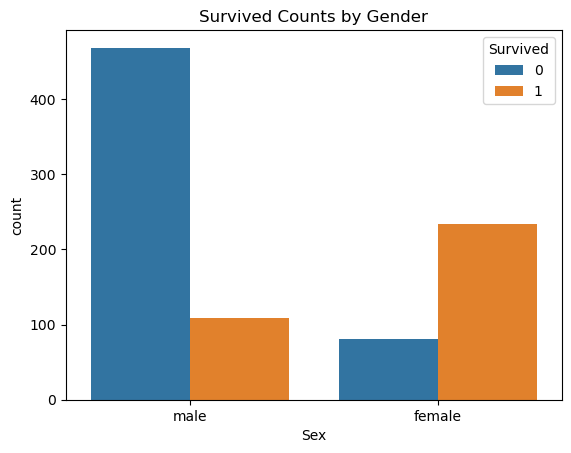

In [77]:
# Pclass
sns.countplot(x='Pclass',hue='Survived',data=train_data)
plt.title('Survived Count by Pclass')
plt.show()

# Age
sns.histplot(train_data['Age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.show()

# Sex
sns.countplot(x='Sex',hue='Survived',data= train_data)
plt.title('Survived Counts by Gender')
plt.show()


- Check for any missing values or outliers.

In [78]:
print("----------------------------------------------")
print("        Missing values in each column:")
print("----------------------------------------------\n")
print(train_data.isnull().sum())

----------------------------------------------
        Missing values in each column:
----------------------------------------------

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


- Handle missing values by either filling them (e.g., with median) or removing records with missing data

In [79]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [80]:
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


- Encode categorical variables like `Sex` and `Embarked` into numerical values.

In [81]:
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])  # Male: 1, Female: 0
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])  

- Standardize or normalize the numerical features like `Age` and `Fare`.

In [84]:
X = train_data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']].copy()
y = train_data['Survived']

# 4. Standardize numerical features
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

# Display the first few rows to verify changes
print("Preprocessed feature data:")
print(X.head())

Preprocessed feature data:
   Pclass  Sex       Age      Fare  Embarked
0       3    1 -0.565736 -0.502445         2
1       1    0  0.663861  0.786845         0
2       3    0 -0.258337 -0.488854         2
3       1    0  0.433312  0.420730         2
4       3    1  0.433312 -0.486337         2


### Part 2: Implementing k-NN and Decision Trees 

- Split the dataset into training and testing sets (70% training, 30% testing). 

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- Implement the k-Nearest Neighbors (k-NN) algorithm and train the model using the 
training set. 

In [86]:
knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
knn.fit(X_train, y_train)

KNeighborsClassifier()

- Implement a Decision Tree algorithm and train it using the same training set.

In [87]:
dtree = DecisionTreeClassifier()  # Decision Tree model
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

- Use the test set to make predictions for both models. 
- Evaluate the performance of each model using accuracy, precision, recall, and F1-score. 
- Compare the results and discuss which model performed better

In [93]:
knn_predictions = knn.predict(X_test)
print("----------------------------------------------")
print("        k-NN Classification Report:")
print("----------------------------------------------\n")
print(classification_report(y_test, knn_predictions))

# 4.2 Decision Tree predictions and evaluation
dtree_predictions = dtree.predict(X_test)
print("----------------------------------------------")
print("   Decision Tree Classification Report:")
print("----------------------------------------------\n")
print(classification_report(y_test, dtree_predictions))

knn_accuracy = accuracy_score(y_test, knn_predictions)
dtree_accuracy = accuracy_score(y_test, dtree_predictions)
print(f"k-NN Accuracy: {knn_accuracy:.2f}")
print(f"Decision Tree Accuracy: {dtree_accuracy:.2f}")

----------------------------------------------
        k-NN Classification Report:
----------------------------------------------

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       157
           1       0.75      0.68      0.72       111

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.77      0.78      0.77       268

----------------------------------------------
   Decision Tree Classification Report:
----------------------------------------------

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       157
           1       0.72      0.70      0.71       111

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

k-NN Accuracy: 0.78
Decision Tree Accuracy: 0.76


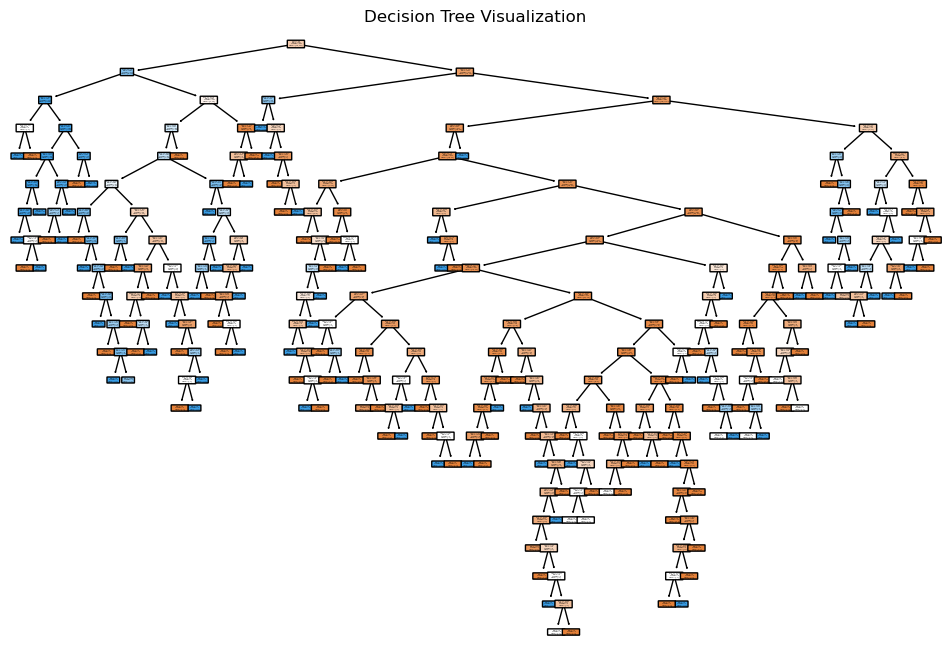

In [95]:
plt.figure(figsize=(12,8))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['Did not survive', 'Survived'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

- Create visualizations to display the decision boundaries of both models (k-NN and 
Decision Tree) using two features from the dataset. 
- Plot the data points along with the decision boundaries to show how each model 
classifies the data.


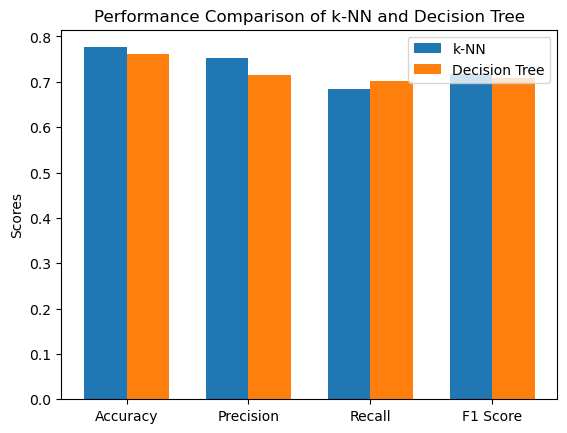

In [99]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
dtree_accuracy = accuracy_score(y_test, dtree_predictions)

knn_precision = precision_score(y_test, knn_predictions)
dtree_precision = precision_score(y_test, dtree_predictions)

knn_recall = recall_score(y_test, knn_predictions)
dtree_recall = recall_score(y_test, dtree_predictions)

knn_f1 = f1_score(y_test, knn_predictions)
dtree_f1 = f1_score(y_test, dtree_predictions)

# Prepare data for performance comparison visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1]
dtree_scores = [dtree_accuracy, dtree_precision, dtree_recall, dtree_f1]

# Plotting performance metrics
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, knn_scores, width, label='k-NN')
bars2 = ax.bar(x + width/2, dtree_scores, width, label='Decision Tree')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of k-NN and Decision Tree')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

- Plot a bar chart showing the performance metrics (accuracy, precision, recall, F1-score) of both models for easy comparison. 

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


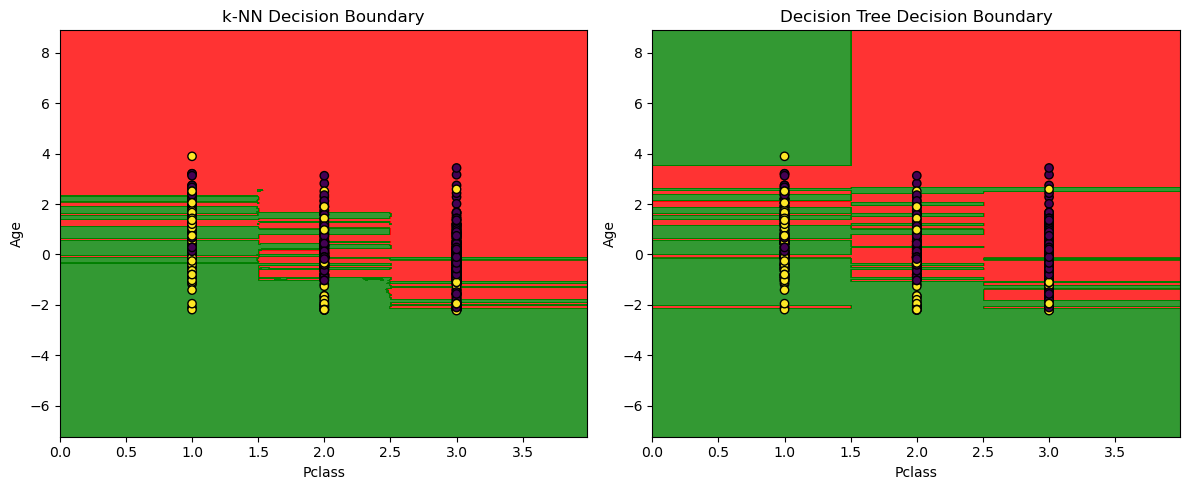

In [103]:
# Handle missing values in Age by filling with the median
X['Age'] = X['Age'].fillna(X['Age'].median())

# Select only Pclass and Age for model training
X_train = X[['Pclass', 'Age']].dropna()
y_train = y[X_train.index]

# Fit models using only Pclass and Age
knn.fit(X_train, y_train)
dtree.fit(X_train, y_train)

# Select only Pclass and Age for decision boundary visualization
X_boundary = X[['Pclass', 'Age']].dropna()
y_boundary = y[X_boundary.index]

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_boundary['Pclass'].min() - 1, X_boundary['Pclass'].max() + 1
y_min, y_max = X_boundary['Age'].min() - 5, X_boundary['Age'].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Plotting decision boundary for k-NN
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_boundary['Pclass'], X_boundary['Age'], c=y_boundary, edgecolor='k', marker='o')
plt.title('k-NN Decision Boundary')
plt.xlabel('Pclass')
plt.ylabel('Age')

# Plotting decision boundary for Decision Tree
plt.subplot(1, 2, 2)
Z = dtree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_boundary['Pclass'], X_boundary['Age'], c=y_boundary, edgecolor='k', marker='o')
plt.title('Decision Tree Decision Boundary')
plt.xlabel('Pclass')
plt.ylabel('Age')

plt.tight_layout()
plt.show()
